In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('../../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../../DATA/Denis_Mukwege.jpg',0)
solvy = cv2.imread('../../DATA/solvay_conference.jpg',0)

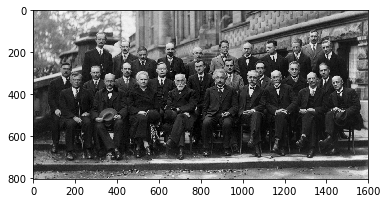

In [6]:
plt.imshow(solvy,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('../../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [8]:
def detect_face(img):

    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y), (x+w,y+h),(255,255,255),10)

    return face_img

In [13]:
result = detect_face(solvy)

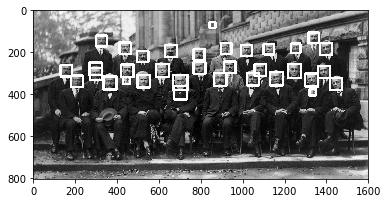

In [14]:
plt.imshow(result,cmap='gray')

In [31]:
def adj_detect_face(img):

    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y), (x+w,y+h),(255,255,255),5)

    return face_img

In [16]:
adj_result = adj_detect_face(solvy)

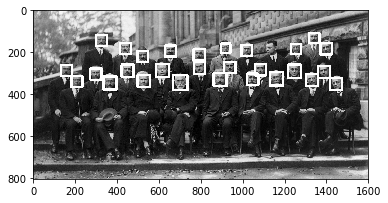

In [17]:
plt.imshow(adj_result,cmap='gray')

In [18]:
eye_cascade = cv2.CascadeClassifier('../../DATA/haarcascades/haarcascade_eye.xml')

In [30]:
def detect_eyes(img):

    eyes_img = img.copy()

    eyes_rects = eye_cascade.detectMultiScale(eyes_img,scaleFactor=1.2,minNeighbors=10)

    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(eyes_img,(x,y), (x+w,y+h),(255,255,255),5)

    return eyes_img

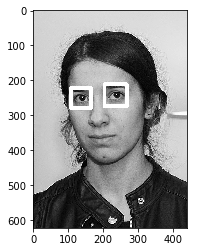

In [23]:
eyes_result = detect_eyes(nadia)
plt.imshow(eyes_result,cmap='gray')

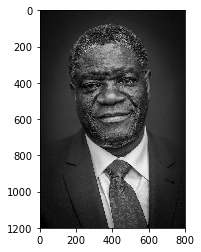

In [24]:
eyes_result = detect_eyes(denis)
plt.imshow(eyes_result,cmap='gray')

** Face Video Detection **

In [32]:
cap = cv2.VideoCapture(0)

while True:

    ret,frame = cap.read(0)

    frame = detect_eyes(frame)

    cv2.imshow('Video Face Detect', frame)

    k = cv2.waitKey(1)
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()